In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d_tweets = pd.read_csv('train_data_cleaning.csv')

In [3]:
d_tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1


In [4]:
d_tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this # earthquake...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask . Canada,1
2,5,NaN,NaN,All residents asked to ' shelter in place ' ...,1
3,6,NaN,NaN,"13,000 people receive # wildfires evacuation ...",1
4,7,NaN,NaN,Just got sent this photo from Ruby # Alaska a...,1


In [5]:
d_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
locations = d_tweets['location'].dropna()

In [7]:
locations = locations.replace(r'\W+', ' ', regex=True)

In [8]:
d_tweets['text'] = d_tweets['text'].replace(r'\W+', ' ', regex=True)

In [9]:
d_tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,13 000 people receive wildfires evacuation ord...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,Aria Ahrary TheTawniest The out of control wi...,1
7610,10871,NaN,NaN,M1 94 01 04 UTC 5km S of Volcano Hawaii,1
7611,10872,NaN,NaN,Police investigating after an e bike collided ...,1


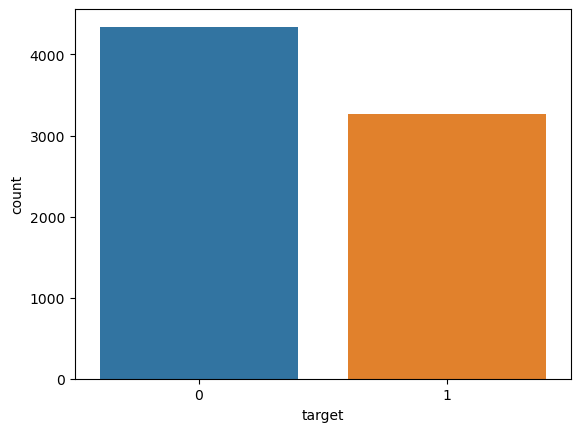

In [10]:
sns.countplot(x=d_tweets['target']);

# Natural Language Processing

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [12]:
count_vect = CountVectorizer(stop_words='english')

In [13]:
X = d_tweets['text']
y = d_tweets['target']

In [14]:
matrix = count_vect.fit_transform(d_tweets[d_tweets['target']==1]['text'])
freqs = zip(count_vect.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    

print("Most Common True Disaster Words Used")
print("\n")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Most Common True Disaster Words Used


[('news', 174), ('disaster', 121), ('malaysia', 121), ('california', 117), ('police', 113), ('suicide', 112), ('people', 106), ('storm', 101), ('like', 96), ('killed', 95), ('hiroshima', 94), ('flight', 89), ('just', 89), ('airlines', 86), ('fires', 86), ('year', 86), ('crash', 85), ('families', 81), ('train', 79), ('emergency', 77)]


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [18]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('naive',MultinomialNB())])

In [19]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('naive', MultinomialNB())])

In [20]:
y_pred = pipe.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1330
           1       0.84      0.64      0.73       954

    accuracy                           0.80      2284
   macro avg       0.81      0.78      0.78      2284
weighted avg       0.80      0.80      0.79      2284



In [23]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',SVC())])

In [24]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', SVC())])

In [25]:
y_pred = pipe.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1330
           1       0.83      0.67      0.74       954

    accuracy                           0.80      2284
   macro avg       0.81      0.79      0.79      2284
weighted avg       0.81      0.80      0.80      2284



In [27]:
from sklearn.linear_model import LogisticRegressionCV

In [28]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('log_m',LogisticRegressionCV(max_iter=5000))])

In [29]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('log_m', LogisticRegressionCV(max_iter=5000))])

In [30]:
y_pred = pipe.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1330
           1       0.79      0.71      0.75       954

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



### Testing on Unseen Data

In [32]:
test_df = pd.read_csv('test_data_cleaning.csv')

In [33]:
test_df['text'] = test_df['text'].replace(r'\W+', ' ', regex=True)

In [34]:
test_df['text'].head()

0                   Just happened a terrible car crash
1    Heard about earthquake is different cities sta...
2    there is a forest fire at spot pond geese are ...
3                Apocalypse lighting Spokane wildfires
4        Typhoon Soudelor kills 28 in China and Taiwan
Name: text, dtype: object

In [35]:
col = test_df['text']

In [36]:
predictions = pipe.predict(col)

In [37]:
df = pd.DataFrame({'Texts':col,'Predictions':predictions})

In [38]:
df

,Texts,Predictions
0,Just happened a terrible car crash,1
1,Heard about earthquake is different cities sta...,0
2,there is a forest fire at spot pond geese are ...,1
3,Apocalypse lighting Spokane wildfires,0
4,Typhoon Soudelor kills 28 in China and Taiwan,1
...,...,...
3258,EARTHQUAKE SAFETY LOS ANGELES SAFETY FASTENERS...,1
3259,Storm in RI worse than last hurricane My city ...,1
3260,Green Line derailment in Chicago,1
3261,MEG issues Hazardous Weather Outlook HWO,1
